# K-Means Clustering

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('balancesheet.csv')
dataset

,_id,accord_code,bs_adjusted_book_value,bs_advances,bs_amt_due_from_firm_directors_interested,bs_assets_as_held_for_sale_and_discontinued_operations,bs_assets_in_transit,bs_balances_with_banks_and_money_at_call,bs_book_value,bs_borrowings,...,bs_unsecured_loans,bs_year,bs_year_end,bs_year_end_date,bs_year_range,bs_year_range_one,bs_year_range_previous,bs_year_range_previous_one,company_name,sector
0,63ee41d8f55b322aae997fb1,124348,104.986100,0,0.0,0.0,0.0,0,104.986145,0,...,8.570000,2022,202203,2022-03-31T00:00:00.000Z,2027-03-30T00:00:00.000Z,2022-03-31T00:00:00.000Z,2027-03-31T00:00:00.000Z,2021-04-01T00:00:00.000Z,Aarti Drugs Ltd.,HealthCare
1,63ee41d8f55b322aae997fb2,124348,92.233000,0,0.0,0.0,0.0,0,92.232972,0,...,8.570000,2021,202103,2021-03-31T00:00:00.000Z,2022-03-30T00:00:00.000Z,2021-03-31T00:00:00.000Z,2021-03-31T00:00:00.000Z,2020-04-01T00:00:00.000Z,Aarti Drugs Ltd.,HealthCare
2,63ee41d8f55b322aae997fb3,124348,66.715700,0,0.0,0.0,0.0,0,266.862876,0,...,8.570000,2020,202003,2020-03-31T00:00:00.000Z,2021-03-30T00:00:00.000Z,2020-03-31T00:00:00.000Z,2020-03-31T00:00:00.000Z,2019-04-01T00:00:00.000Z,Aarti Drugs Ltd.,HealthCare
3,63ee41d8f55b322aae997fb4,124348,54.975700,0,0.0,0.0,0.0,0,219.902553,0,...,8.570000,2019,201903,2019-03-31T00:00:00.000Z,2020-03-30T00:00:00.000Z,2019-03-31T00:00:00.000Z,2019-03-31T00:00:00.000Z,2018-04-01T00:00:00.000Z,Aarti Drugs Ltd.,HealthCare
4,63ee41d8f55b322aae997fb5,124348,45.921700,0,0.0,0.0,0.0,0,183.686949,0,...,12.170000,2018,201803,2018-03-31T00:00:00.000Z,2019-03-30T00:00:00.000Z,2018-03-31T00:00:00.000Z,2018-03-31T00:00:00.000Z,2017-04-01T00:00:00.000Z,Aarti Drugs Ltd.,HealthCare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38416,6415a8c903fcdedce5c834c8,117176,-37.957811,0,0.0,0.0,0.0,0,-37.957811,0,...,9.065400,2004,200403,2004-03-31T00:00:00.000Z,2005-03-30T00:00:00.000Z,2004-03-31T00:00:00.000Z,2004-03-31T00:00:00.000Z,2003-04-01T00:00:00.000Z,Webel Communication Industries Ltd.,Telecom
38417,6415a8c903fcdedce5c834c9,117176,-40.774228,0,0.0,0.0,0.0,0,-40.774228,0,...,7.588400,2003,200303,2003-03-31T00:00:00.000Z,2004-03-30T00:00:00.000Z,2003-03-31T00:00:00.000Z,2003-03-31T00:00:00.000Z,2002-04-01T00:00:00.000Z,Webel Communication Industries Ltd.,Telecom
38418,6415a8c903fcdedce5c834ca,117176,-33.686308,0,0.0,0.0,0.0,0,-33.686308,0,...,2.917600,2002,200203,2002-03-31T00:00:00.000Z,2003-03-30T00:00:00.000Z,2002-03-31T00:00:00.000Z,2002-03-31T00:00:00.000Z,2001-04-01T00:00:00.000Z,Webel Communication Industries Ltd.,Telecom
38419,6415a8c903fcdedce5c834cb,117176,-26.500532,0,0.0,0.0,0.0,0,-26.500532,0,...,2.578736,2001,200103,2001-03-31T00:00:00.000Z,2002-03-30T00:00:00.000Z,2001-03-31T00:00:00.000Z,2001-03-31T00:00:00.000Z,2000-04-01T00:00:00.000Z,Webel Communication Industries Ltd.,Telecom


In [7]:
pd.set_option('display.max_rows',1049)

In [8]:
X = dataset.loc[:, ['bs_total_assets', 'bs_total_liabilities']].values
X

array([[2034.5216  , 2034.5216  ],
       [1637.0055  , 1637.0055  ],
       [1470.696   , 1470.696   ],
       ...,
       [   4.549   ,    4.549   ],
       [   5.715961,    5.715961],
       [   6.590585,    6.590585]])

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

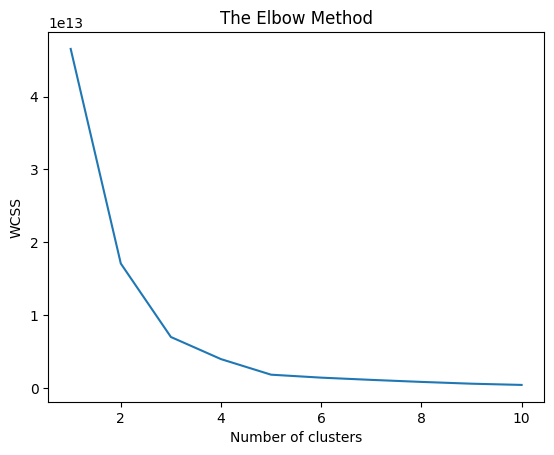

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

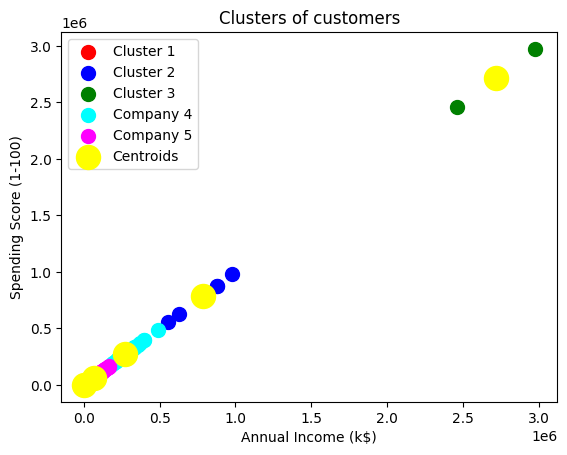

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Company 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Company 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()